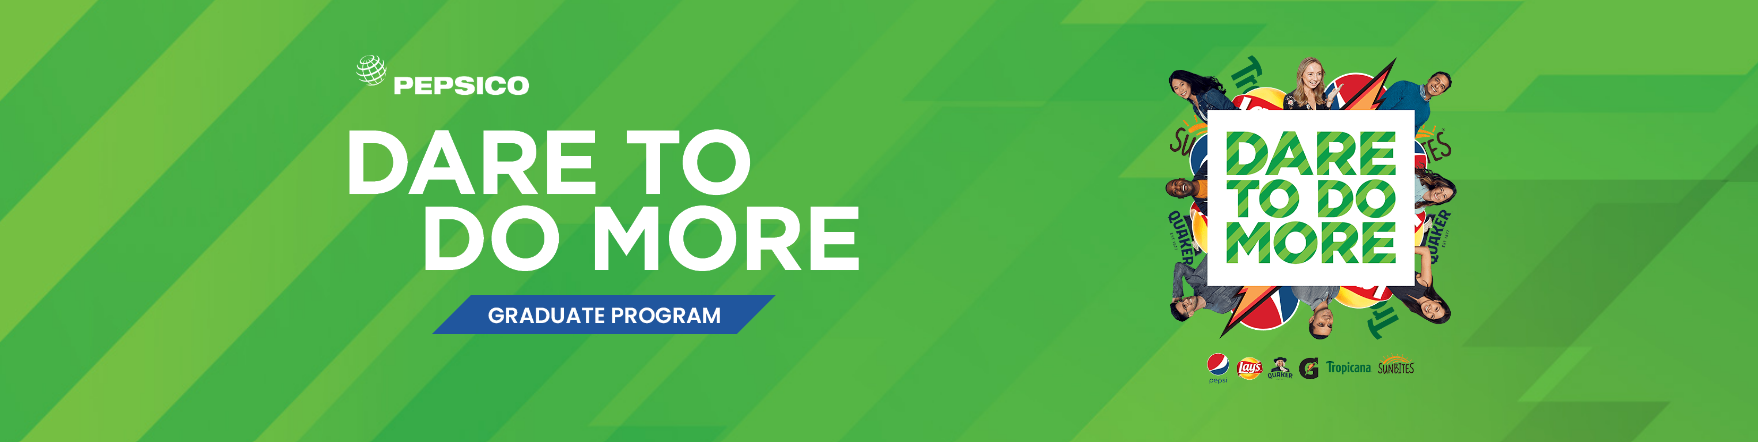

# <font color='blue'>**PepsiCo’s Global Student Challenge** </font>

## <font color='green'>**Focus: How to be more sustainable** </font>

## Introduction

Europeans produce an average of 35kg of plastic <b>packaging waste</b> each per year. According to the OECD, plastic consumption will triple by 2060. Packaging amassed in daily life is not recycled and instead ends up in landfills or incinerators.

It is estimated that at best 40 per cent of Europe’s plastic waste is recycled.

The lack of recycling is paired with an enormous demand for new plastic, which brings dramatic consequences. Plastic is made from oil and gas, fossil fuels that drive the climate crisis.


One of <b>Pepsico's PEP+ goals</b> is to introduce <b>more sustainable packaging</b> into the value chain and to cut virgin plastic per serving by 50% by 2030. 

In the following document we will review the recycling rate of packaging waste by type of packaging across Europe, and how it has evolved through the last decade. 

Packaging waste covers wasted material that was used for the containment, protection, handling, delivery and presentation of goods, from raw materials to processed goods, from the producer to the user or the consumer, excluding production residues.

This analysis will provide a clearer picture about reciclying ratio difference between plastic and other materials. 

## Waste packaging statistics - Exploratory analysis

SOURCE OF DATA: Eurostat

DATASET: Recycling rates for packaging waste

DATA SOURCE URL: https://ec.europa.eu/eurostat/databrowser/view/ten00063/default/table?lang=en

LAST UPDATE: 21.03.23 23:00:00

EXTRACTION DATE: 27.05.23 17:40:00

WASTE TYPE: Packaging (all), Paper and cardboard, Plastic, Wooden, Metallic, Aluminium, Steel, Glass, Other

TIME SERIES: 2009 to 2020, yearly data

GEO: EU aggregates, single EU countries

UNITS: Kilograms per capita, Tonne, Percentage

### Load modules

In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Data cleaning

In [167]:
#reading data from "Eurostat Recycling rates for packaging waste"

df = pd.read_csv('recycling_rate_packaging.csv') 

In [168]:
#Checking the columns included in our dataset

df.columns  


Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'waste', 'unit', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [169]:
# Quick view of the top rows of the dataset
df.head()



,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W1501,RT,AT,2009,66.9,NaN
1,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W1501,RT,AT,2010,66.6,NaN
2,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W1501,RT,AT,2011,65.8,NaN
3,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W1501,RT,AT,2012,65.9,NaN
4,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W1501,RT,AT,2013,66.6,NaN


In [170]:
# Quick view of the bottom rows of the dataset

df.tail()

,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
2245,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W150107,RT,UK,2014,67.2,NaN
2246,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W150107,RT,UK,2015,65.7,NaN
2247,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W150107,RT,UK,2016,66.9,NaN
2248,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W150107,RT,UK,2017,67.6,NaN
2249,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,W150107,RT,UK,2018,68.5,NaN


In [171]:
#There are 2250 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     2250 non-null   object 
 1   LAST UPDATE  2250 non-null   object 
 2   freq         2250 non-null   object 
 3   waste        2250 non-null   object 
 4   unit         2250 non-null   object 
 5   geo          2250 non-null   object 
 6   TIME_PERIOD  2250 non-null   int64  
 7   OBS_VALUE    2250 non-null   float64
 8   OBS_FLAG     126 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 158.3+ KB


In [55]:
#Checking the unique values for some of the columns 

In [173]:
for col in df:
    if col == 'OBS_VALUE':
        print(col)
        print('\n')
    else:
        
        print(col)
        print(df[col].unique())
        print('\n')

DATAFLOW
['ESTAT:TEN00063(1.0)']


LAST UPDATE
['21/03/23 23:00:00']


freq
['A']


waste
['W1501' 'W150101' 'W150102' 'W150103' 'W150104' 'W150107']


unit
['RT']


geo
['AT' 'BE' 'BG' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'EU27_2020' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LI' 'LT' 'LU' 'LV' 'MT' 'NL' 'NO' 'PL' 'PT'
 'RO' 'SE' 'SI' 'SK' 'UK']


TIME_PERIOD
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


OBS_VALUE


OBS_FLAG
[nan 'e' 'b' 'be' 's']




The column "waste" includes codes for each type of material. For readability purposes, we will replace those codes with the actual material names.

W1501 = Packaging \
W150101  = Paper and cardboard \
W150102  = Plastic \
W150103 = Wooden \
W150104 = Metallic \
W150107 = Glass 

The label "Packaging" refers to all packaging in general. The data shows average results for all types of packaging material.

In [174]:
df['waste'] = df['waste'].replace(['W1501','W150101','W150102','W150103','W150104','W150107'],['Packaging','Paper and cardboard','Plastic','Wooden','Metallic','Glass'])

In [175]:
#waste codes replaced with actual names

df.head()

,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,Packaging,RT,AT,2009,66.9,NaN
1,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,Packaging,RT,AT,2010,66.6,NaN
2,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,Packaging,RT,AT,2011,65.8,NaN
3,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,Packaging,RT,AT,2012,65.9,NaN
4,ESTAT:TEN00063(1.0),21/03/23 23:00:00,A,Packaging,RT,AT,2013,66.6,NaN


In [176]:
#Removing some of the columns that don't include relevant information

df =df.drop(columns=['DATAFLOW','LAST UPDATE','freq','OBS_FLAG'])

In [177]:
df.head()

,waste,unit,geo,TIME_PERIOD,OBS_VALUE
0,Packaging,RT,AT,2009,66.9
1,Packaging,RT,AT,2010,66.6
2,Packaging,RT,AT,2011,65.8
3,Packaging,RT,AT,2012,65.9
4,Packaging,RT,AT,2013,66.6


In [178]:
#Renaming columns so the format is more homogenous
df.columns = df.columns.str.lower()

## Analysis

The column "geo" shows country codes for Europe and one code referring to all countries together "EU_27_2020". We will focus on the global data for Europe.


In [179]:

#Creating a subset with data for all EU_27 countries together

EU_27 = df[df['geo']=='EU27_2020']

In [180]:
EU_27

,waste,unit,geo,time_period,obs_value
118,Packaging,RT,EU27_2020,2009,62.6
119,Packaging,RT,EU27_2020,2010,64.0
120,Packaging,RT,EU27_2020,2011,64.2
121,Packaging,RT,EU27_2020,2012,65.2
122,Packaging,RT,EU27_2020,2013,65.4
...,...,...,...,...,...
2000,Glass,RT,EU27_2020,2016,75.3
2001,Glass,RT,EU27_2020,2017,75.8
2002,Glass,RT,EU27_2020,2018,75.8
2003,Glass,RT,EU27_2020,2019,75.6


In [181]:
#Obtaining mean values of recycling rate per material

EU_27[['waste','obs_value']].groupby("waste").mean().sort_values('obs_value', ascending=False)

,obs_value
waste,
Paper and cardboard,83.658333
Metallic,77.666667
Glass,73.891667
Packaging,65.316667
Plastic,38.450000
Wooden,36.091667


We can see that <b>plastic packaging has one of the lowest recycling rates</b>. On the other hand, paper and cardboard are the most sustainable materials, as their recycling rate is the highest. 



Let's focus on the <b>evolution of recycling rates through the years for general packaging.</b>

In [182]:
#filtering the dataset for general packaging
EU_27_packaging = EU_27.loc[(EU_27['waste']== 'Packaging')]

In [183]:
EU_27_packaging


,waste,unit,geo,time_period,obs_value
118,Packaging,RT,EU27_2020,2009,62.6
119,Packaging,RT,EU27_2020,2010,64.0
120,Packaging,RT,EU27_2020,2011,64.2
121,Packaging,RT,EU27_2020,2012,65.2
122,Packaging,RT,EU27_2020,2013,65.4
123,Packaging,RT,EU27_2020,2014,66.5
124,Packaging,RT,EU27_2020,2015,66.6
125,Packaging,RT,EU27_2020,2016,67.6
126,Packaging,RT,EU27_2020,2017,67.5
127,Packaging,RT,EU27_2020,2018,65.6


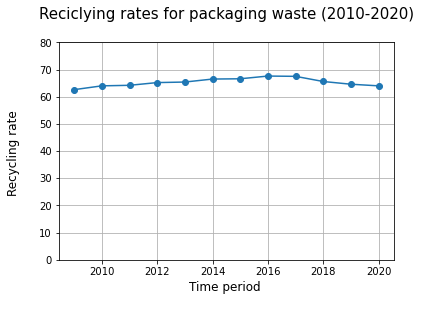

In [184]:
#Creating a line chart to show the evolution of recycling rates of packaging waste.

EU_27_packaging.plot(x='time_period',y='obs_value', kind='line', marker='o', legend= False)

plt.ylim([0,80])
plt.xlabel("Time period \n", fontsize=12)
plt.ylabel("Recycling rate \n", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.title('Reciclying rates for packaging waste (2010-2020)\n', fontsize=15)
plt.show()



The recycling rate for packaging waste has been very <b>stable through the years</b>, with values around 60% - 65%.

¿Are the values also stable for every packaging material? Let's see the evolution of recycling rate for each type of packaging.

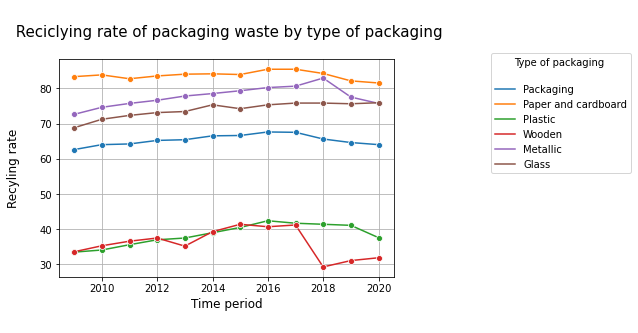

In [185]:
#Creating a line chart to display the evolution of each material

sns.lineplot(data=EU_27, x="time_period", y="obs_value", hue="waste", marker='o')

plt.legend(title="Type of packaging \n", fontsize=10, loc='upper center', bbox_to_anchor=(1.50, 1.05))
plt.xlabel("Time period\n", fontsize=12)
plt.ylabel("Recyling rate\n", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

plt.title('\n Reciclying rate of packaging waste by type of packaging\n', fontsize=15)
plt.show();

The<b> packaging materials with a consistently higher recycling rate are definitely paper and cardboard, followed by metallic and glass </b>, all three of them with values around 70% and 80%. The evolution is positive and steady for most of the period studied. However, from 2018 onwards there's a small decrease in the recycling rate of plastic and metallic materials.

At the bottom of the chart we can see the evolution of plastic packaging waste and also wood. The recycling rate is significantly lower for these two materials, with a maximum rate of 40%. Although the recycling rate is very low for plastic packaging, there's a positive trend through the years.


In [ ]:
#Exporting datasets to CSV

df.to_csv(r'recyling_rate_data.csv', index = False)

In [187]:
EU_27.to_csv(r'EU_27.csv', index = False)